![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<h2><center>AIML - Final Project - NLP2</center></h2>
<center>Abhishek Galagali - Eswar Sunder - Srinath K</center>


#### Problem Statement
DOMAIN: Industrial safety. NLP based Chatbot.

CONTEXT: The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
Columns description:
1. Data: timestamp or time/date information
2. Countries: which country the accident occurred (anonymised)
3. Local: the city where the manufacturing plant is located (anonymised)
4. Industry sector: which sector the plant belongs to
5. Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
6. Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
7. Gender: if the person is male of female
8. Employee or Third Party: if the injured person is an employee or a third party
9. Critical Risk: some description of the risk involved in the accident
10. Description: Detailed description of how the accident happened.

Link to download the dataset: https://drive.google.com/ ile/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,

Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

#### Milestone 1
Process:
- Step 1: Import the data
- Step 2: Data cleansing
- Step 3: Data preprocessing
- Step 4: Data preparation to be used for AIML model learning

Output: Clean data as .xlsx or .csv ile to be used for AIML model learning


In [1]:
#Libraries for reading data and visualising the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

#Libraries for data pre processing and imputing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer

#Libraries for text analysis
import re
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import  Counter

#Libraries for output analysis
from sklearn import metrics

### Step 1: Import the data

In [2]:
# Function for Quick look into the dataset
def data_analysis(data):
    print('********Shape*********')
    print(data.shape)
    print('********Head*********')    
    print(data.head())
    print('********Info*********')
    print(data.info())
    print('********Nulls*********')
    print(data.isnull().sum())
    print('********Distribution*********')
    print(data.describe().transpose())


In [3]:
# Reading the dataset
data=pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

In [4]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [5]:
data_analysis(data)

********Shape*********
(425, 11)
********Head*********
   Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk               

#### Quick takes from the first look
1. 'Unnamed: 0' column can be dropped
2. Variable name 'Data' should be changed to 'Date'
3. Variable name 'Genre' should be changed to 'Gender'
4. All the variables are categorical
5. There is no missing data in any of the columns hence the data is complete.


### Step 2: Data Cleansing

In [6]:
#Rename procedure
data=data.rename(columns={'Data':'Date','Genre':'Gender'})

In [7]:
#Dropping unnecessary variable
data=data.drop('Unnamed: 0',axis=1)

In [8]:
data.dtypes.value_counts()

object    10
dtype: int64

In [9]:
## Checking for duplicates data
data.duplicated().value_counts()

False    418
True       7
dtype: int64

In [10]:
duplicate_data=data.duplicated()

In [11]:
data[duplicate_data]

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [12]:
data=data.drop_duplicates()

In [13]:
#Final Shape of the data
data.shape

(418, 10)

Quick check on distribution of the variables

In [14]:
data_view_columns=[ 'Date','Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee or Third Party',
       'Critical Risk']
for value in data_view_columns:
    print(f'Viewing the unique values of {value} \n {data[value].value_counts()} \n\n')

Viewing the unique values of Date 
 2017-02-08 00:00:00    6
2016-06-16 00:00:00    5
2017-06-11 00:00:00    4
2016-06-08 00:00:00    4
2016-02-15 00:00:00    4
                      ..
2016-09-02 00:00:00    1
2016-01-01 00:00:00    1
2017-05-17 00:00:00    1
2016-08-04 00:00:00    1
2016-10-04 00:00:00    1
Name: Date, Length: 287, dtype: int64 


Viewing the unique values of Countries 
 Country_01    248
Country_02    129
Country_03     41
Name: Countries, dtype: int64 


Viewing the unique values of Local 
 Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_11     2
Local_09     2
Name: Local, dtype: int64 


Viewing the unique values of Industry Sector 
 Mining    237
Metals    134
Others     47
Name: Industry Sector, dtype: int64 


Viewing the unique values of Accident Level 
 I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64 


Viewing

Cleaning text entries and edits

In [15]:
#Distribution of number of words
data['Description'].apply(lambda x:len(str(x).split(" "))).describe()

count    418.000000
mean      65.064593
std       32.081179
min       16.000000
25%       40.000000
50%       60.000000
75%       83.000000
max      183.000000
Name: Description, dtype: float64

In [16]:
#Converting all entries to lower case
data['Description'] = data['Description'].apply(lambda x:str(x).lower())

In [17]:
def regex_finder(text):    
    regex = re.compile('(1[0-2]|0?[1-9]):([0-5][0-9]) ?([Aa]?.[Mm])|([Pp]?.[Mm])$')
    print(regex.findall(text))

data['Description'].apply(regex_finder)

[]
[]
[]
[('9', '45', 'am', '')]
[('11', '45', 'a.m', '')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('11', '22', 'am', '')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('11', '50', 'a.m', '')]
[]
[]
[]
[]
[]
[]
[]
[('5', '45', 'pm', '')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('2', '40', 'am', '')]
[]
[]
[]
[]
[]
[]
[('12', '20', 'pm', '')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('11', '30', 'am', '')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('10', '50', 'am', '')]
[('9', '45', 'pm', '')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('5', '45', 'pm', '')]
[]
[]
[]
[]
[]
[]
[]
[]
[('11', '00', 'a.m', '')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('8', '35', 'pm', '')]
[]
[('9', '00', 'am', '')]
[]
[]
[]
[]
[]
[]
[]
[('05', '30', 'am', '')]

0      None
1      None
2      None
3      None
4      None
       ... 
420    None
421    None
422    None
423    None
424    None
Name: Description, Length: 418, dtype: object

In [18]:
def time_handler(text):
    out_text = re.sub('(1[0-2]|0?[1-9]):([0-5][0-9]) ?([Aa]?.[Mm])', 'morning', text)
    out_text = re.sub('(1[0-2]|0?[1-9]):([0-5][0-9]) ?([Pp]?.[Mm])', 'evening', out_text)    
    return out_text

data['Description'] = data['Description'].apply(time_handler)

In [19]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,while removing the drill rod of the jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,during the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,in the sub-station milpo located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,being morning. approximately in the nv. 1880 c...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,approximately at morning. in circumstances tha...


In [20]:
#Removing puntuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['Description'] = data['Description'].apply(remove_punctuations)

#### Observations from the data cleaning process
1. Time components can be extracted from 'Date' variable
2. 'Critical Risk' is heavily skewed and incidence of most entries are less than 10
3. There is only one incident recoreded under Potential Accident Level 'VI'. This level can be combined with Level 'V' and renamed as 'V+' (short for 5 or greater than 5)
4. 'Description' field is rich with an average amount of 65 words per entry
5. There were 7 duplicate records in the dataset which have been removed
6. All columns except description are categorical and don't have any outliers.

After data cleansing we are left with 418 records and 10 columns.

#### Data set Insights
- 287 different days incidets are captures in given data set
- 3 different countries incident details are present
- 12 different cities incidents information is captured in data sets
- Incident details of three industry types is present
- 5 different accident levels are rated
- 6 different potential accident levels are categorised on accident
- Both males are females are working in the industry
- There are many different types of critical risks types in the given data set

### Step 3: Data Pre Processing and EDA 

In [21]:
## Changing the datatype of the date column
data['Date']=pd.to_datetime(data['Date'])

In [22]:
def dateColumsExpansion():
    data['Year']=data['Date'].dt.year
    data['month']=data['Date'].dt.month
    data['hour']=data['Date'].dt.hour
    data['day']=data['Date'].dt.day
    data['minutes']=data['Date'].dt.minute
    data['weekday']=data['Date'].dt.day_name()

In [23]:
data.dtypes.value_counts()

object            9
datetime64[ns]    1
dtype: int64

In [24]:
### Creating more columns based on the given time duation of the incident
dateColumsExpansion()

In [25]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,month,hour,day,minutes,weekday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,while removing the drill rod of the jumbo 08 f...,2016,1,0,1,0,Friday
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,during the activation of a sodium sulphide pum...,2016,1,0,2,0,Saturday
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,in the substation milpo located at level 170 w...,2016,1,0,6,0,Wednesday
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,being morning approximately in the nv 1880 cx6...,2016,1,0,8,0,Friday
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,approximately at morning in circumstances that...,2016,1,0,10,0,Sunday


Checking the newly created time components

In [26]:
date_columns=['Year','month','day','hour','minutes','weekday']

In [27]:
for value in date_columns:
    print(f'Viewing the unique values of {value} \n {data[value].value_counts()} \n\n')

Viewing the unique values of Year 
 2016    283
2017    135
Name: Year, dtype: int64 


Viewing the unique values of month 
 2     61
4     51
6     51
3     50
5     40
1     39
7     24
9     24
12    23
8     21
10    21
11    13
Name: month, dtype: int64 


Viewing the unique values of day 
 8     25
4     22
16    19
11    18
22    17
24    16
23    16
25    15
18    15
17    15
13    15
15    14
30    14
1     14
5     14
10    13
6     13
2     13
14    12
9     12
29    12
7     11
20    11
19    11
12    11
3     10
21     9
26     9
27     9
31     7
28     6
Name: day, dtype: int64 


Viewing the unique values of hour 
 0    418
Name: hour, dtype: int64 


Viewing the unique values of minutes 
 0    418
Name: minutes, dtype: int64 


Viewing the unique values of weekday 
 Thursday     76
Tuesday      69
Wednesday    62
Friday       61
Saturday     56
Monday       53
Sunday       41
Name: weekday, dtype: int64 




Hours and Minutes are not useful. Dropping them

In [28]:
data=data.drop(['minutes','hour'], axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  month                     418 non-null    int64         
 12  day                   

#### Observations
- data type of the date column is changed to datetime to do more deeper analysis
- Based on the date information we are extracting year, month, date, weekday, hour, minutes
- Hour and Minutes in date entry is same hence dropping
- Captured incidents are happened during 2016 and 2017 years
- We can do EDA for more understanding of data and visulization

Checking the Level 6 row

In [30]:
data[data['Potential Accident Level'] == "VI"]

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,month,day,weekday
307,2017-01-25,Country_01,Local_03,Mining,V,VI,Male,Third Party,remains of choco,during the process of loading drills in the ca...,2017,1,25,Wednesday


Combining Level 5 and Level 6

In [31]:
data.loc[data['Potential Accident Level'] == "V",'Potential Accident Level'] = 'V+'
data.loc[data['Potential Accident Level'] == "VI",'Potential Accident Level'] = 'V+'

### Univeriate analysis

In [32]:
def countplotdistributionwise(columnData,totalData):
    g=sns.countplot(columnData)
    #print(g.patches)
    for k in g.patches:
        #print(k.get_height(),k.get_x(),k.get_width())
        g.annotate(str(np.round(k.get_height()/len(totalData)*(100), decimals=2)), (k.get_x()+k.get_width()/2,k.get_height()), ha='center', va='center',xytext=(0,5), textcoords='offset points')
    

/home/batman/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Accident Level Distibutions')

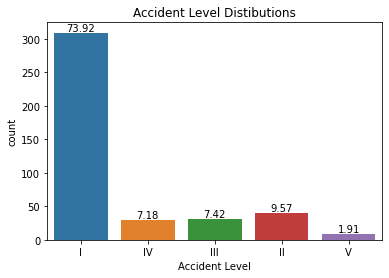

In [33]:
countplotdistributionwise(columnData = data['Accident Level'], totalData = data)
plt.title('Accident Level Distibutions')

- 73% of the accidents are level 1 accidents
- 1.91% of accidents are of level 5 which of concern

/home/batman/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


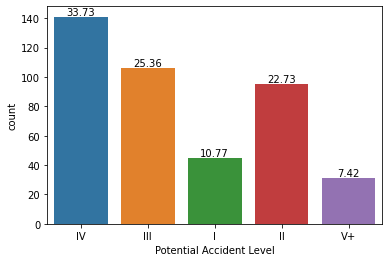

In [34]:
countplotdistributionwise(data['Potential Accident Level'],data)

- 33.7 % of accidents are level 4 potential accidents
- 25 % are level 3 potential accidents
- 22% are level 2 potential accidents
- 0.24 % are level 6 potential accidents which is of more concern

/home/batman/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


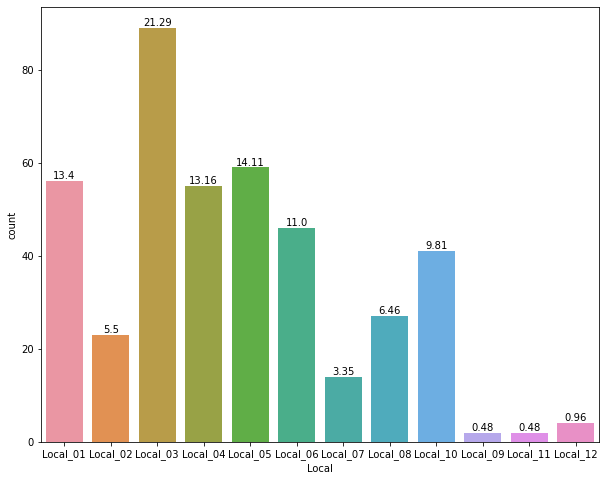

In [35]:
plt.figure(figsize=(10,8))
countplotdistributionwise(data['Local'],data)

- Accidents are happened in 12 different locals
- 21.29 % of accidents happened in local 3
- 14% accidents happened in Local 5
- 13 % accidents happened in local 4
- 13% accidents happened in local 1
- 0.48% accidents happened in local 9 and local 11 each

<AxesSubplot:xlabel='Gender', ylabel='count'>

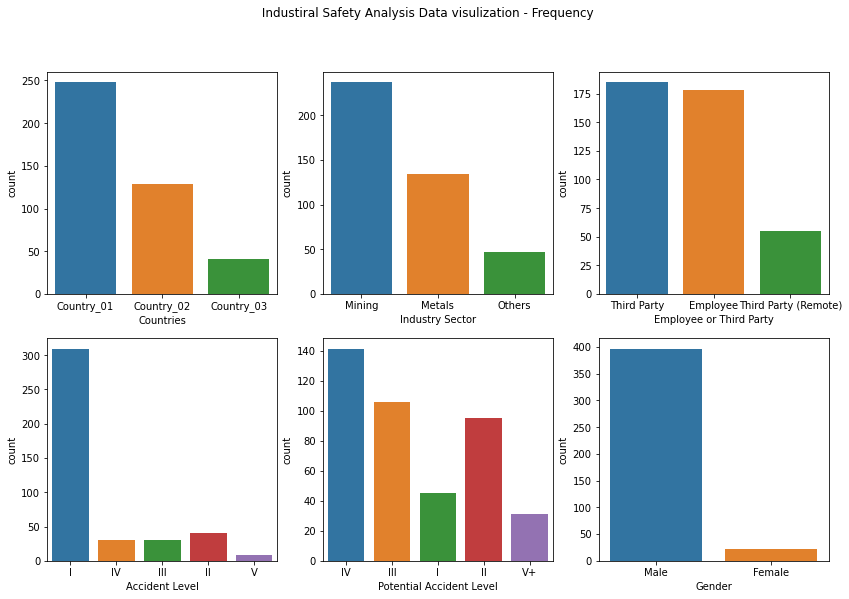

In [36]:
fig,ax=plt.subplots(2,3, figsize=(14,9))
fig.suptitle(' Industiral Safety Analysis Data visulization - Frequency')

sns.countplot(ax=ax[0,0], x=data['Countries'])
sns.countplot(ax=ax[0,1], x=data['Industry Sector'])
sns.countplot(ax=ax[0,2], x=data['Employee or Third Party'])
sns.countplot(ax=ax[1,0], x=data['Accident Level'])
sns.countplot(ax=ax[1,1], x=data['Potential Accident Level'])
sns.countplot(ax=ax[1,2], x=data['Gender'])


- Most accidents reported in Country 1 follwed by country 2 and 3
- Most fo the industries are of Mining follwed by Metals and others
- Most of the people involved in accident are of third party and Employes follweed by remote third party
- 2/3 of the accidents reported in 2016
- Most of the incidents seen in feb to jun months
- Few Female emplyess are involved in incidents reported

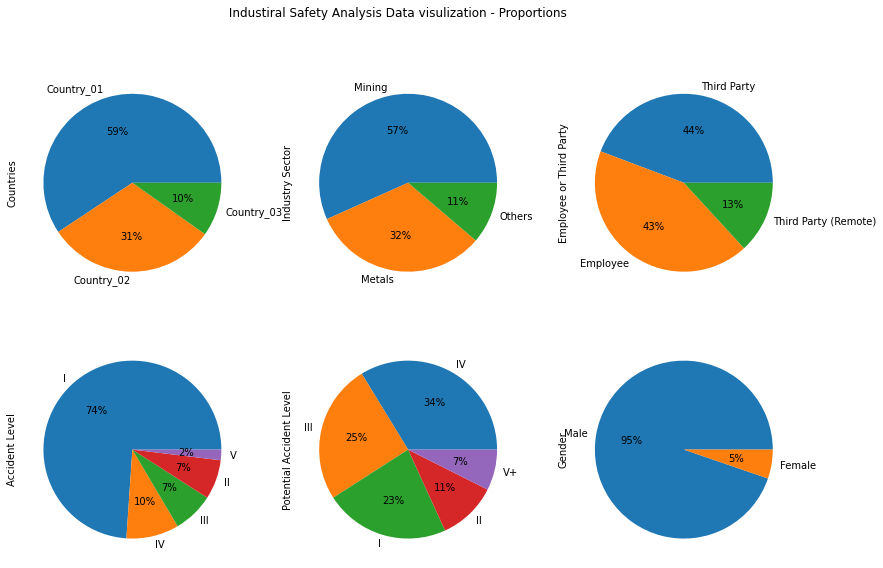

In [37]:
fig,ax=plt.subplots(2,3, figsize=(14,9))
fig.suptitle(' Industiral Safety Analysis Data visulization - Proportions')

data['Countries'].value_counts().plot(ax=ax[0,0], kind = 'pie', autopct = '%.0f%%', labels = data['Countries'].unique());
data['Industry Sector'].value_counts().plot(ax=ax[0,1], kind = 'pie', autopct = '%.0f%%', labels = data['Industry Sector'].unique());
data['Employee or Third Party'].value_counts().plot(ax=ax[0,2], kind = 'pie', autopct = '%.0f%%', labels = data['Employee or Third Party'].unique());
data['Accident Level'].value_counts().plot(ax=ax[1,0], kind = 'pie', autopct = '%.0f%%', labels = data['Accident Level'].unique());
data['Potential Accident Level'].value_counts().plot(ax=ax[1,1], kind = 'pie', autopct = '%.0f%%', labels = data['Potential Accident Level'].unique());
data['Gender'].value_counts().plot(ax=ax[1,2], kind = 'pie', autopct = '%.0f%%', labels = data['Gender'].unique());

<AxesSubplot:xlabel='weekday', ylabel='count'>

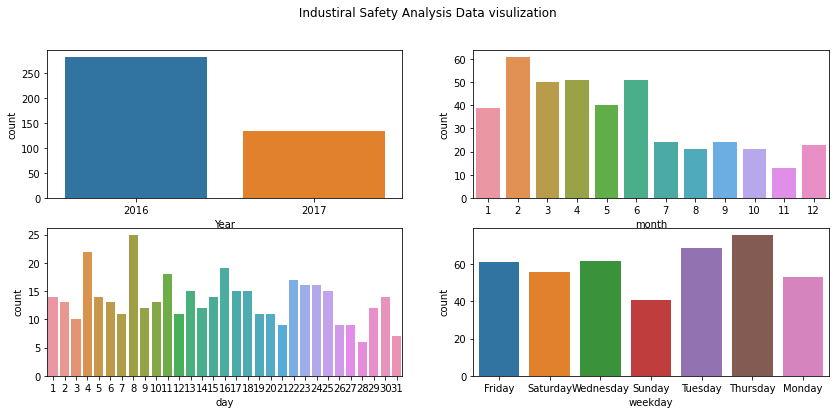

In [38]:
fig,ax=plt.subplots(2,2, figsize=(14,6))
fig.suptitle(' Industiral Safety Analysis Data visulization')

sns.countplot(ax=ax[0,0], x=data['Year'])
sns.countplot(ax=ax[0,1], x=data['month'])
sns.countplot(ax=ax[1,0], x=data['day'])
sns.countplot(ax=ax[1,1], x=data['weekday'])

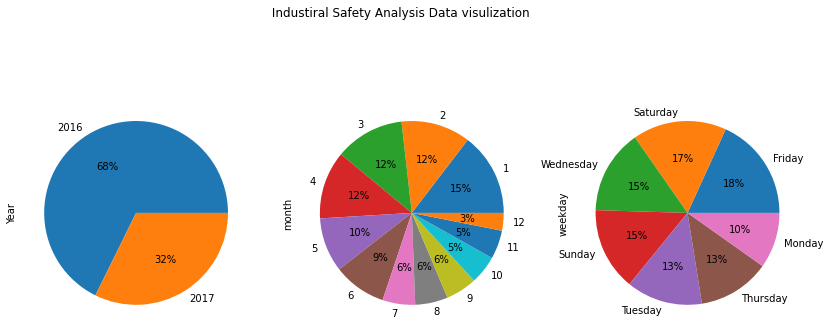

In [39]:
fig,ax=plt.subplots(1, 3, figsize=(14,6))
fig.suptitle(' Industiral Safety Analysis Data visulization')


data['Year'].value_counts().plot(ax=ax[0], kind = 'pie', autopct = '%.0f%%', labels = data['Year'].unique());
data['month'].value_counts().plot(ax=ax[1], kind = 'pie', autopct = '%.0f%%', labels = data['month'].unique());
data['weekday'].value_counts().plot(ax=ax[2], kind = 'pie', autopct = '%.0f%%', labels = data['weekday'].unique());


#### Key takeaways from univariate analysis
1. Order of Accident level proportions makes sense with Level 1 accidents more frequent and Level 5+ accidents least frequent.
2. Interestingly, Potential accidents are centered around Level 3. This is the potential dependent variable of the project. It would be interesting to see crosstab between Potential accident levels and accident levels
3. Local levels 'Local_09', 'Local_11', and 'Local_12' are under represented, probably from country 3 will confirm in bivariate analysis.
4. Female are very low proportion which makes intuitive sense as it is Industry sector 
5. Most data points are in year 2016
6. There less number of cases recorded in second half of the year. But is this a sample problem? Will check it out in cross tab analysis

### Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

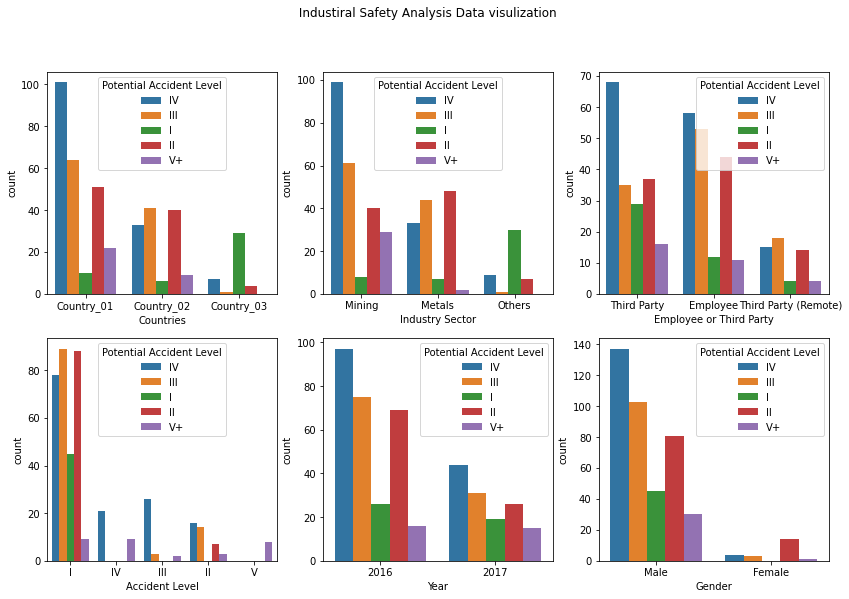

In [40]:
fig,ax=plt.subplots(2,3, figsize=(14,9))
fig.suptitle(' Industiral Safety Analysis Data visulization')

sns.countplot(ax=ax[0,0], x=data['Countries'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[0,1], x=data['Industry Sector'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[0,2], x=data['Employee or Third Party'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[1,0], x=data['Accident Level'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[1,1], x=data['Year'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[1,2], x=data['Gender'],hue=data['Potential Accident Level'])


In [41]:
def crosstab_dist(var1,var2,df):    
    print(pd.crosstab(df[var1], df[var2]))    
pairs = [['Accident Level', 'Potential Accident Level'],
         ['month','Year'],
         ['Year','Potential Accident Level'],
         ['Countries','Local'],
         ['Critical Risk','Potential Accident Level']         
        ]
for pair in pairs:
    print('***************************')
    crosstab_dist(pair[0],pair[1],data)    
    print('\n')

***************************
Potential Accident Level   I  II  III  IV  V+
Accident Level                               
I                         45  88   89  78   9
II                         0   7   14  16   3
III                        0   0    3  26   2
IV                         0   0    0  21   9
V                          0   0    0   0   8


***************************
Year   2016  2017
month            
1        12    27
2        31    30
3        34    16
4        28    23
5        26    14
6        31    20
7        19     5
8        21     0
9        24     0
10       21     0
11       13     0
12       23     0


***************************
Potential Accident Level   I  II  III  IV  V+
Year                                         
2016                      26  69   75  97  16
2017                      19  26   31  44  15


***************************
Local       Local_01  Local_02  Local_03  Local_04  Local_05  Local_06  \
Countries                                         

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

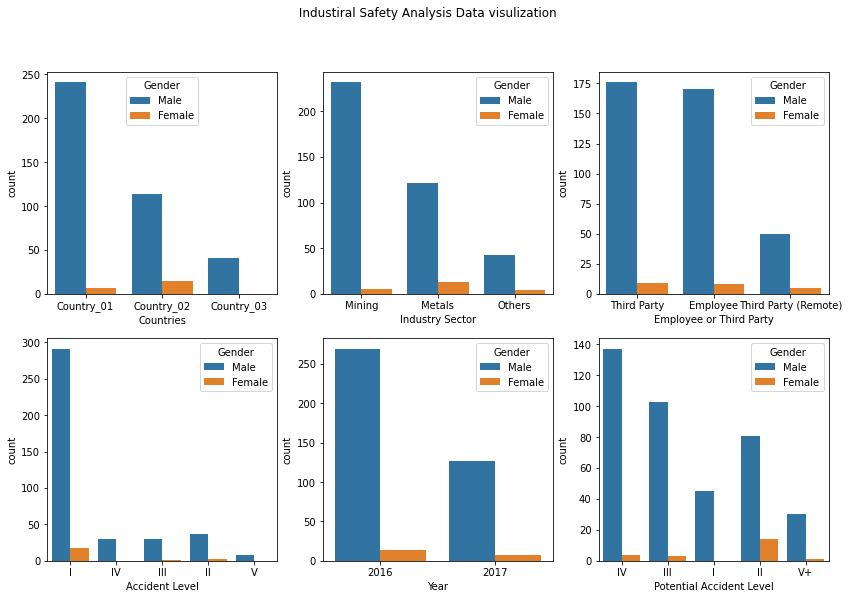

In [42]:
fig,ax=plt.subplots(2,3, figsize=(14,9))
fig.suptitle(' Industiral Safety Analysis Data visulization')

sns.countplot(ax=ax[0,0], x=data['Countries'],hue=data['Gender'])
sns.countplot(ax=ax[0,1], x=data['Industry Sector'],hue=data['Gender'])
sns.countplot(ax=ax[0,2], x=data['Employee or Third Party'],hue=data['Gender'])
sns.countplot(ax=ax[1,0], x=data['Accident Level'],hue=data['Gender'])
sns.countplot(ax=ax[1,1], x=data['Year'],hue=data['Gender'])
sns.countplot(ax=ax[1,2], x=data['Potential Accident Level'],hue=data['Gender'])

#### Key takeaways from bivariate analysis
1. Less accidents in second half of the year is a sampling issue. The data was collected from presumably mid January of 2016 to start if July 2017
2. Locals have a one to one mapping to country which makes sense
3. Accident levels are always less than or equal to Potential accident levels. This is clear from lower triangular matrix being 0.
4. As we are building this model for future purposes, including time components in the model does not make any sense. Besides any seasonality signal cannot be picked up as there is 1 or 2 datapoints per month.

Text exploration

In [43]:
#Creating a list of words
def create_word_list(df,var):
    corpus=[]
    for x in df[var].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [44]:
word_list=create_word_list(data,'Description')
stop=set(stopwords.words('english'))

In [45]:
#Counting number of variables in the list and retaining non stop words from first 100 words
counter=Counter(word_list)
most=counter.most_common()
words=[]
counts=[]
for word,count in most[:100]:
    if (word not in stop) :
        words.append(word)
        counts.append(count)

len(words)

63

Seems to be there are only 63 non stop words in top 100 most frequent words

<AxesSubplot:>

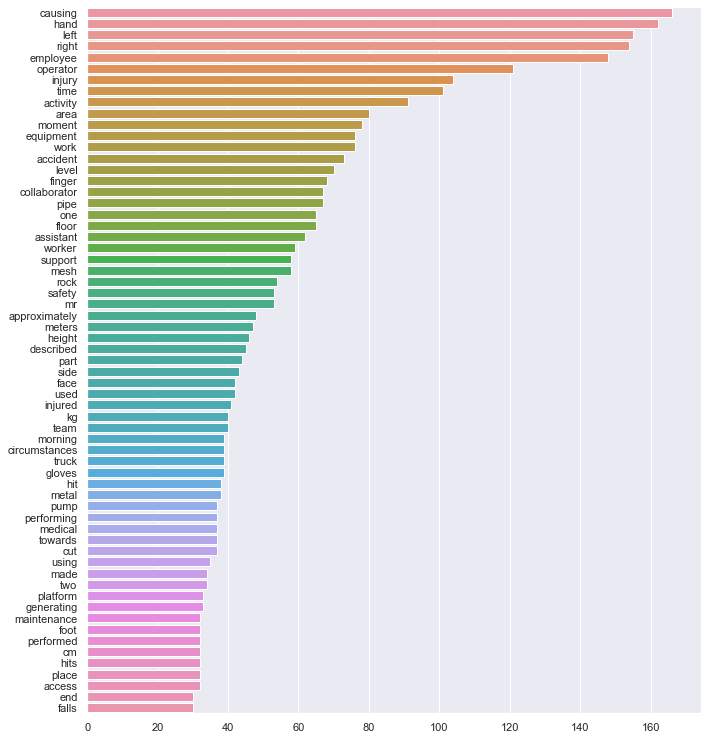

In [46]:
sns.set(rc={'figure.figsize':(11,13)})
sns.barplot(x=counts,y=words)

The data above shows the most frequent non stop words. Lets check the most frequent non stop words within potential accient levels

In [47]:
#This unnecessarily complicated code will compute counts of the words in each levels of Potential acciden level

def word_level_counter_by_DV(df,var):
    
    pot_acc_1 = {}
    pot_acc_2 = {}
    pot_acc_3 = {}
    pot_acc_4 = {}
    pot_acc_5 = {}
    
    words = []
                
    for i,row in df.iterrows():
        for word in row[var].split():
            if (word not in stop):
                words.append(word)
                if row['Potential Accident Level'] == "I":
                    if word in pot_acc_1:
                        pot_acc_1[word] = pot_acc_1[word] + 1
                    else:
                        pot_acc_1[word] = 1
                if row['Potential Accident Level'] == "II":                    
                    if word in pot_acc_2:
                        pot_acc_2[word] = pot_acc_2[word] + 1
                    else:
                        pot_acc_2[word] = 1
                if row['Potential Accident Level'] == "III":
                    if word in pot_acc_3:
                        pot_acc_3[word] = pot_acc_3[word] + 1
                    else:
                        pot_acc_3[word] = 1
                if row['Potential Accident Level'] == "IV":
                    if word in pot_acc_4:
                        pot_acc_4[word] = pot_acc_4[word] + 1
                    else:
                        pot_acc_4[word] = 1
                if row['Potential Accident Level'] == "V+":
                    if word in pot_acc_5:
                        pot_acc_5[word] = pot_acc_5[word] + 1
                    else:
                        pot_acc_5[word] = 1
                        
    final_words = []
    final_1 = []   
    final_2 = []   
    final_3 = []   
    final_4 = []   
    final_5 = []
    
    for word in words:
        final_words.append(word)
        
        if word in pot_acc_1:
            final_1.append(pot_acc_1[word])   
        else:
            final_1.append(np.nan)   
            
        if word in pot_acc_2:
            final_2.append(pot_acc_2[word])   
        else:
            final_2.append(np.nan)   
            
        if word in pot_acc_3:
            final_3.append(pot_acc_3[word])   
        else:
            final_3.append(np.nan)  
            
        if word in pot_acc_4:
            final_4.append(pot_acc_4[word])   
        else:
            final_4.append(np.nan) 
            
        if word in pot_acc_5:
            final_5.append(pot_acc_5[word])   
        else:
            final_5.append(np.nan)   
                        
    return pd.DataFrame({"Words": final_words, 
                         "Pot_acc_1": final_1, 
                         "Pot_acc_2": final_2, 
                         "Pot_acc_3": final_3, 
                         "Pot_acc_4": final_4, 
                         "Pot_acc_5": final_5})

In [48]:
df_word_DV = word_level_counter_by_DV(data,'Description')
df_word_DV = df_word_DV.drop_duplicates()
df_word_DV.index = df_word_DV['Words']

In [49]:
df_word_DV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3394 entries, removing to laundry
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Words      3394 non-null   object 
 1   Pot_acc_1  770 non-null    float64
 2   Pot_acc_2  1234 non-null   float64
 3   Pot_acc_3  1276 non-null   float64
 4   Pot_acc_4  1914 non-null   float64
 5   Pot_acc_5  734 non-null    float64
dtypes: float64(5), object(1)
memory usage: 185.6+ KB


In [50]:
#Function to create word cloud
def get_cloud(df,var):
    text = df_word_DV.sort_values([var], ascending=[False])[var][0:60]
    text = text.to_dict()
    wc = WordCloud(collocations = False, background_color = 'white')
    wc.fit_words(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

The words sizes are weighted by the frequency of occurance. So, bigger the word more frequently it is mentioned

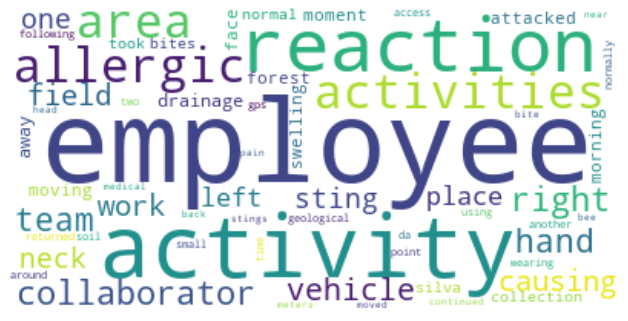

In [51]:
get_cloud(df_word_DV,'Pot_acc_1')

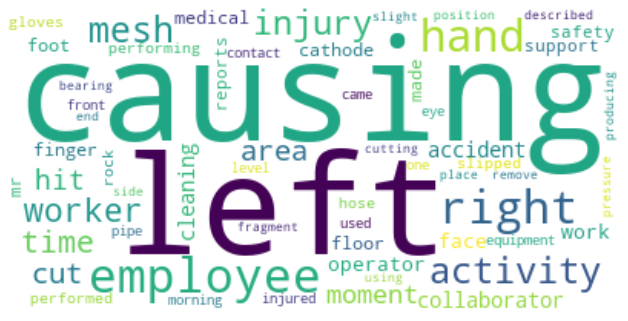

In [52]:
get_cloud(df_word_DV,'Pot_acc_2')

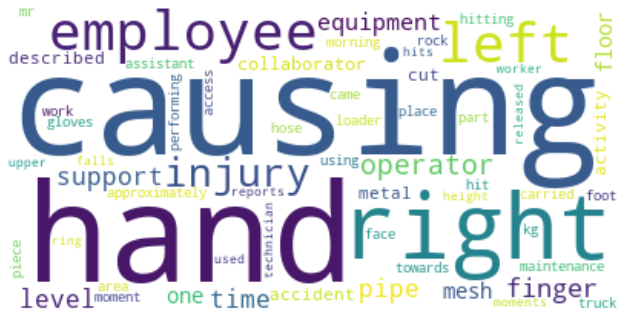

In [53]:
get_cloud(df_word_DV,'Pot_acc_3')

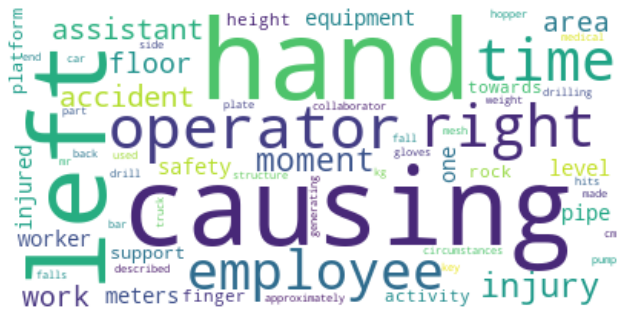

In [54]:
get_cloud(df_word_DV,'Pot_acc_4')

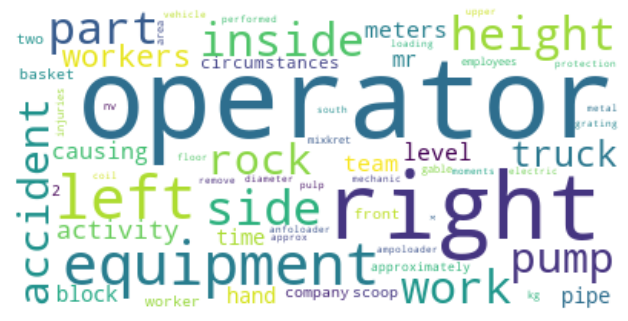

In [55]:
get_cloud(df_word_DV,'Pot_acc_5')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  month                     418 non-null    int64         
 12  day                   

In [57]:
def labelencodingData():
#     encoder_countries=LabelEncoder().fit(data['Countries'])
#     encoder_Local=LabelEncoder().fit(data['Local'])
#     encoder_Industry=LabelEncoder().fit(data['Industry Sector'])
#     encoder_AccidentLevel=LabelEncoder().fit(data['Accident Level'])
#     encoder_Potential=LabelEncoder().fit(data['Genre'])
#     encoder_Employee=LabelEncoder().fit(data[])
    data['Countries']=LabelEncoder().fit_transform(data['Countries'])
    data['Local']=LabelEncoder().fit_transform(data['Local'])
    data['Industry Sector']=LabelEncoder().fit_transform(data['Industry Sector'])
    data['Accident Level']=LabelEncoder().fit_transform(data['Accident Level'])
    data['Potential Accident Level']=LabelEncoder().fit_transform(data['Potential Accident Level'])
    data['Employee or Third Party']=LabelEncoder().fit_transform(data['Employee or Third Party'])
    data['Critical Risk']=LabelEncoder().fit_transform(data['Critical Risk'])
    data['Gender']=LabelEncoder().fit_transform(data['Gender'])
    data['weekday']=LabelEncoder().fit_transform(data['weekday'])
    
    

In [58]:
labelencodingData()

In [59]:
data.dtypes.value_counts()

int64             12
object             1
datetime64[ns]     1
dtype: int64

/home/batman/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/batman/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


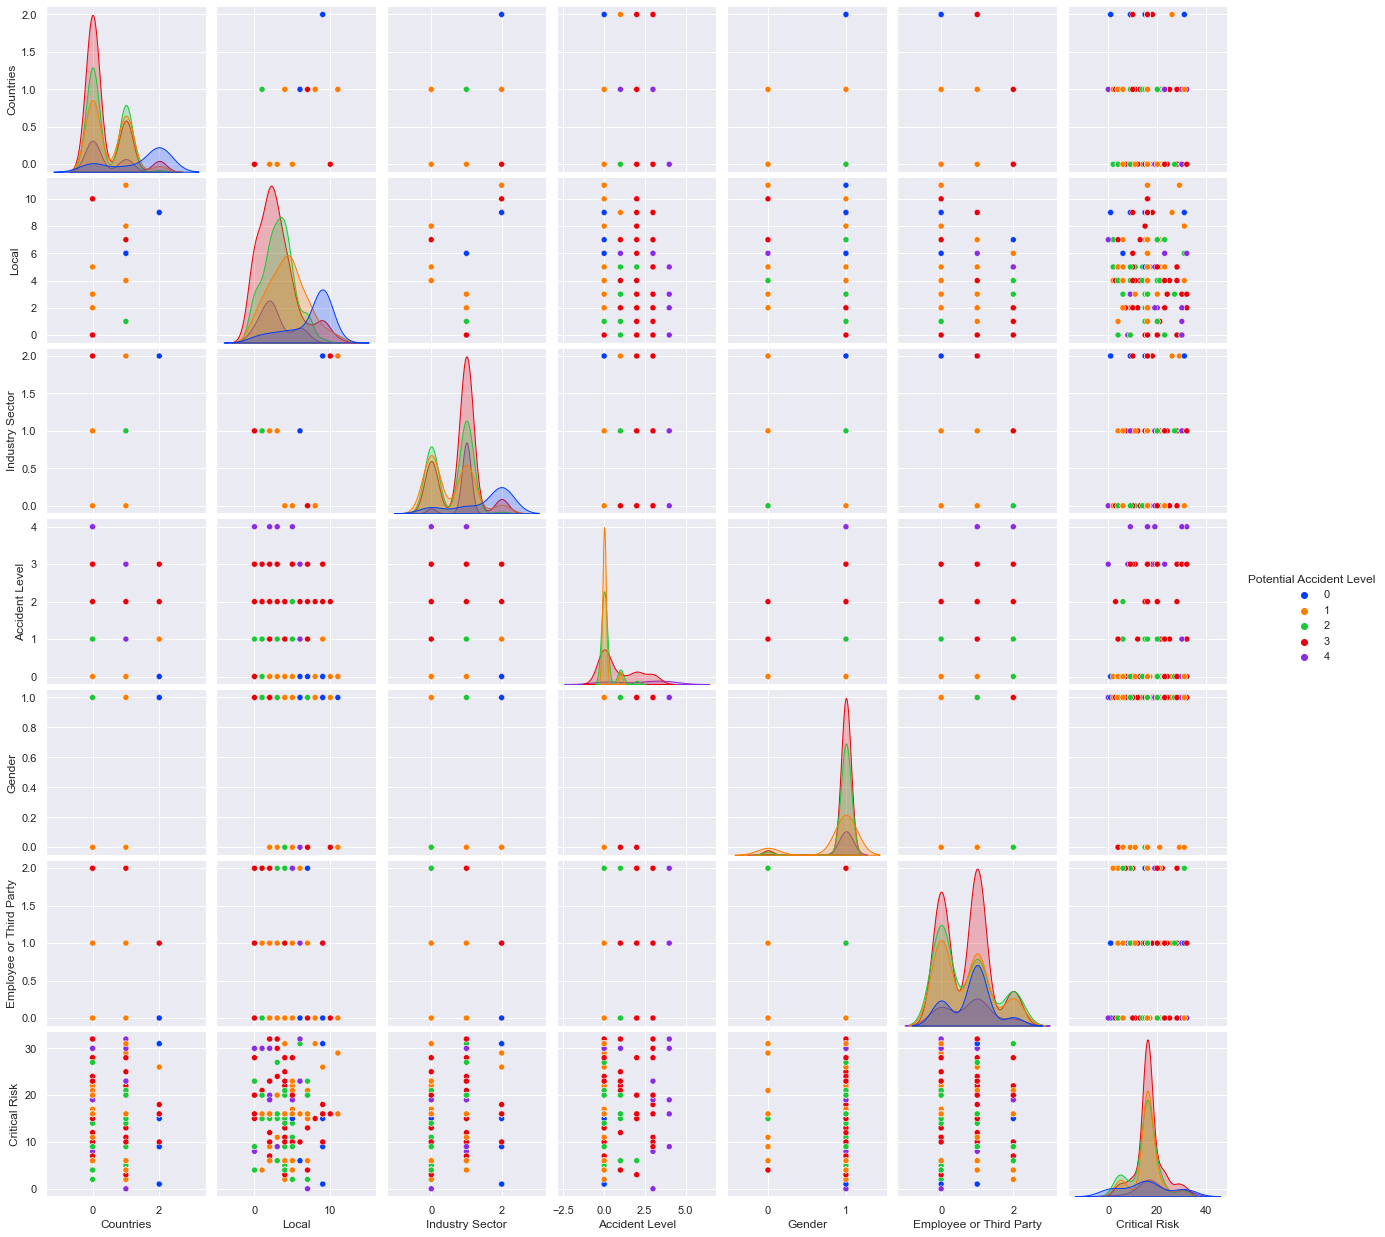

In [60]:
sns.set(rc={'figure.figsize':(30,30)})
sns.pairplot(data.drop(['Description','Year','month','day','weekday'],axis=1),hue='Potential Accident Level',
               palette=sns.color_palette('bright',5))


There is no clear pattern in structured data

In [61]:
def remove_stop_words(df, in_col, out_col):
    df[out_col] = df[in_col].str.split()
    df[out_col] = df[out_col].apply(lambda x: ' '.join([word for word in x if word not in stop]))
    return df

data = remove_stop_words(data,'Description','OE_prep')

In [63]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,month,day,weekday,OE_prep
0,2016-01-01,0,0,1,0,3,1,1,20,while removing the drill rod of the jumbo 08 f...,2016,1,1,0,removing drill rod jumbo 08 maintenance superv...
1,2016-01-02,1,1,1,0,3,1,0,21,during the activation of a sodium sulphide pum...,2016,1,2,2,activation sodium sulphide pump piping uncoupl...
2,2016-01-06,0,2,1,0,2,1,2,15,in the substation milpo located at level 170 w...,2016,1,6,6,substation milpo located level 170 collaborato...
3,2016-01-08,0,3,1,0,0,1,1,16,being morning approximately in the nv 1880 cx6...,2016,1,8,0,morning approximately nv 1880 cx695 ob7 person...
4,2016-01-10,0,3,1,3,3,1,1,16,approximately at morning in circumstances that...,2016,1,10,3,approximately morning circumstances mechanics ...


In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer(num_words = 10000)
t.fit_on_texts(data.OE_prep)
data['sequence'] = t.texts_to_sequences(data.OE_prep)

ERROR! Session/line number was not unique in database. History logging moved to new session 608


In [65]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,month,day,weekday,OE_prep,sequence
0,2016-01-01,0,0,1,0,3,1,1,20,while removing the drill rod of the jumbo 08 f...,2016,1,1,0,removing drill rod jumbo 08 maintenance superv...,"[159, 74, 191, 310, 847, 55, 279, 213, 696, 23..."
1,2016-01-02,1,1,1,0,3,1,0,21,during the activation of a sodium sulphide pum...,2016,1,2,2,activation sodium sulphide pump piping uncoupl...,"[1713, 1129, 1130, 45, 1714, 1715, 1716, 214, ..."
2,2016-01-06,0,2,1,0,2,1,2,15,in the substation milpo located at level 170 w...,2016,1,6,6,substation milpo located level 170 collaborato...,"[849, 1133, 169, 15, 1722, 17, 1134, 13, 850, ..."
3,2016-01-08,0,3,1,0,0,1,1,16,being morning approximately in the nv 1880 cx6...,2016,1,8,0,morning approximately nv 1880 cx695 ob7 person...,"[39, 28, 123, 853, 1725, 1726, 171, 580, 354, ..."
4,2016-01-10,0,3,1,3,3,1,1,16,approximately at morning in circumstances that...,2016,1,10,3,approximately morning circumstances mechanics ...,"[28, 39, 40, 314, 1735, 1736, 1737, 1738, 1739..."


In [66]:
import tensorflow as tf

ERROR! Session/line number was not unique in database. History logging moved to new session 609


In [69]:
padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(data.sequence, padding="post", maxlen = 60)

In [71]:
padded_sequence.shape

(418, 60)

In [73]:
yvec = data['Potential Accident Level'].values

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequence, yvec, train_size=0.7, random_state=1,stratify=yvec)

print(f"Numbers of train instances by class: {np.bincount(y_train)}")
print(f"Numbers of test instances by class: {np.bincount(y_test)}")

Numbers of train instances by class: [31 66 74 99 22]
Numbers of test instances by class: [14 29 32 42  9]


In [ ]:
reset_random_seeds()
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

In [62]:
#data.to_csv('Data_Preprocessed_file.csv')